# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_complete = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")



# Display the data table for preview
mouse_study_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
mouse_count = mouse_study_complete["Mouse ID"].nunique()
mouse_count

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = mouse_study_complete[mouse_study_complete.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]


In [5]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()
clean_study_results = mouse_study_complete[mouse_study_complete['Mouse ID'].isin(duplicate_mouse_ids)]

clean_study_results


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = clean_study_results["Mouse ID"].nunique()
clean_mouse_count


1

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = mouse_study_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Standard_Deviation='std',
    SEM='sem'
).reset_index()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

summary_stats


,Drug Regimen,Mean,Median,Variance,Standard_Deviation,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [12]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

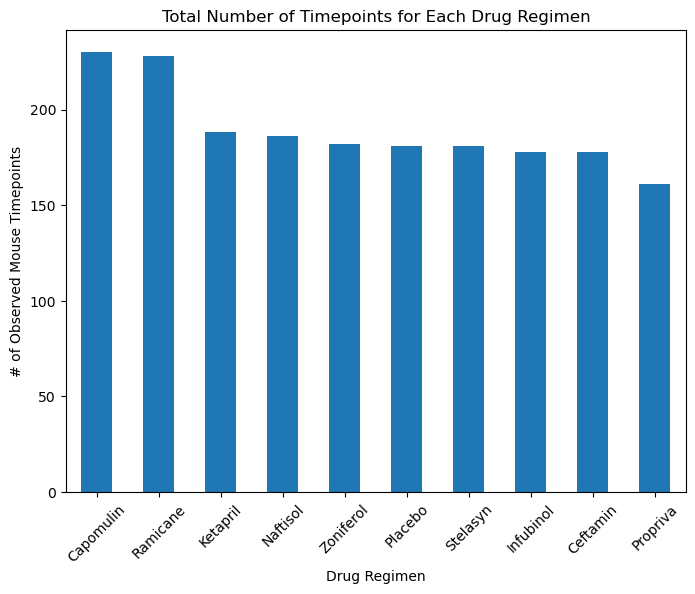

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = mouse_study_complete["Drug Regimen"].value_counts()
regimen_counts.plot(kind="bar", figsize = (8,6), ylabel= "# of Observed Mouse Timepoints",
                    title= "Total Number of Timepoints for Each Drug Regimen")

plt.xticks(rotation = 45)
plt.show()

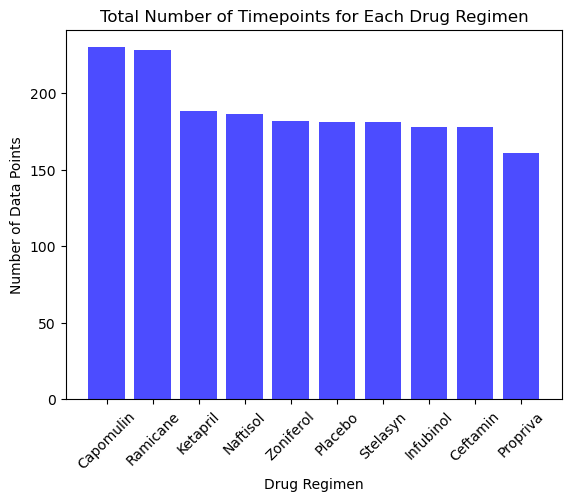

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.Figure(figsize= (8,6))
plt.bar(regimen_counts.index, regimen_counts.values, color="b", alpha=0.7)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Total Number of Timepoints for Each Drug Regimen")

plt.xticks(rotation=45)

plt.show()

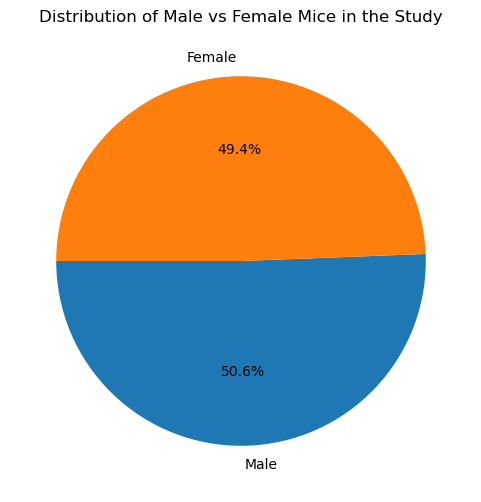

In [18]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
gender_counts = mouse_study_complete["Sex"].value_counts()

# Get the unique mice with their gender
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180)


# Make the pie chart
plt.title("Distribution of Male vs Female Mice in the Study")
plt.show()





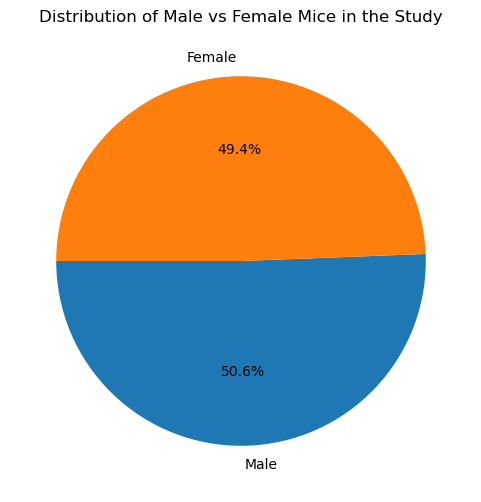

In [ ]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180)  # Using pyplot

# Get the unique mice with their gender


# Make the pie chart

plt.title("Distribution of Male vs Female Mice in the Study")

# Display the chart
plt.title("Distribution of Male vs Female Mice in the Study")
plt.show()


## Quartiles, Outliers and Boxplots

In [ ]:

# Define the selected treatment regimens
selected_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Get the last (greatest) timepoint for each mouse
max_timepoints = study_results.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this grouped DataFrame with the original study_results to get the tumor volume at the last timepoint
merged_df = max_timepoints.merge(study_results, on=["Mouse ID", "Timepoint"], how="left")

# Filter for only the selected treatment regimens
final_tumor_volume_df = merged_df.merge(mouse_metadata, on="Mouse ID")
filtered_tumor_volumes = final_tumor_volume_df[final_tumor_volume_df["Drug Regimen"].isin(selected_treatments)]

# Display the results
filtered_tumor_volumes




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
239,y769,45,68.594745,4,Ceftamin,Female,6,27
240,y793,45,31.896238,2,Capomulin,Male,17,17
241,y865,45,64.729837,3,Ceftamin,Male,23,26
245,z578,45,30.638696,0,Ramicane,Male,11,16


In [28]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_volumes = filtered_tumor_volumes[filtered_tumor_volumes["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    
    # add subset
    tumor_vol_data.append(treatment_volumes)
    
    # Determine outliers using upper and lower bounds
    quartiles = treatment_volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Identify outliers
    outliers = treatment_volumes[(treatment_volumes < lower_bound) | (treatment_volumes > upper_bound)]
    
    print(f"{treatment} potential outliers: {outliers.tolist()}")




Capomulin potential outliers: []
Ramicane potential outliers: []
Infubinol potential outliers: [36.3213458]
Ceftamin potential outliers: []


C:\Users\rober\AppData\Local\Temp\ipykernel_49712\171238389.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tumor_vol_data, labels=treatments, patch_artist=True)


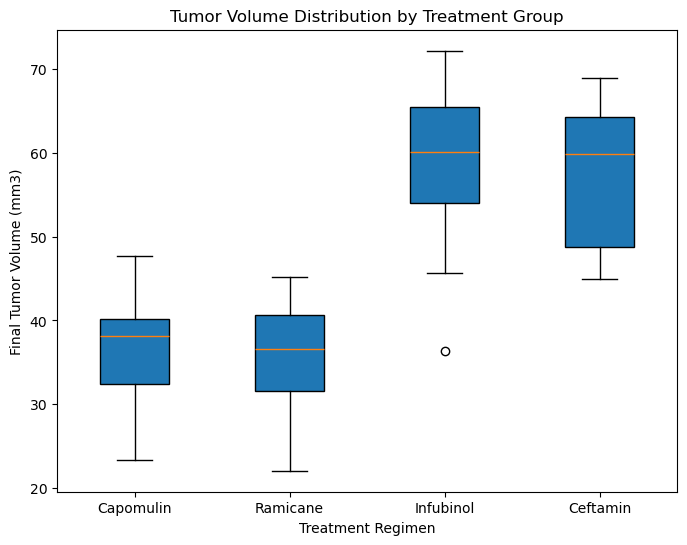

In [29]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(8, 6))
plt.boxplot(tumor_vol_data, labels=treatments, patch_artist=True)

# Add title and labels
plt.title("Tumor Volume Distribution by Treatment Group")
plt.xlabel("Treatment Regimen")
plt.ylabel("Final Tumor Volume (mm3)")

# Show the plot
plt.show()


## Line and Scatter Plots

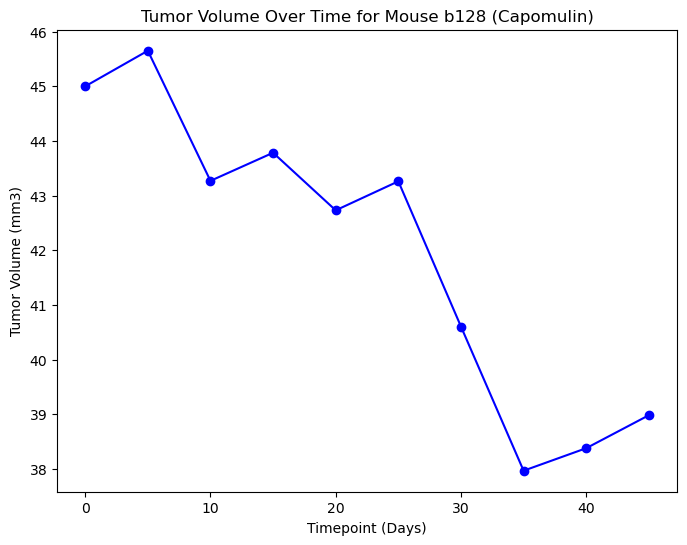

In [31]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mice = filtered_tumor_volumes[filtered_tumor_volumes["Drug Regimen"] == "Capomulin"]["Mouse ID"].unique()
selected_mouse = capomulin_mice[0]  # Select the first mouse

# Extract the tumor volume over time for the selected mouse
mouse_data = study_results[study_results["Mouse ID"] == selected_mouse]

# Generate a line plot
plt.figure(figsize=(8, 6))
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Tumor Volume Over Time for Mouse {selected_mouse} (Capomulin)")

# Show the plot
plt.show()


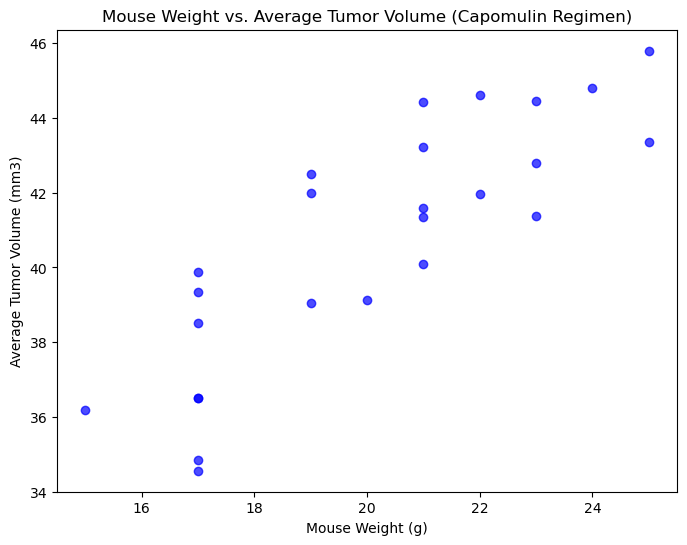

In [32]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter data for only the Capomulin regimen
capomulin_data = filtered_tumor_volumes[filtered_tumor_volumes["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each mouse
avg_tumor_volume = study_results[study_results["Mouse ID"].isin(capomulin_data["Mouse ID"])].groupby("Mouse ID")["Tumor Volume (mm3)"].mean().reset_index()

# Merge with mouse metadata to get weight information
capomulin_merged = avg_tumor_volume.merge(mouse_metadata, on="Mouse ID")

# Generate a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(capomulin_merged["Weight (g)"], capomulin_merged["Tumor Volume (mm3)"], color='b', alpha=0.7)

# Add labels and title
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")

# Show the plot
plt.show()



## Correlation and Regression

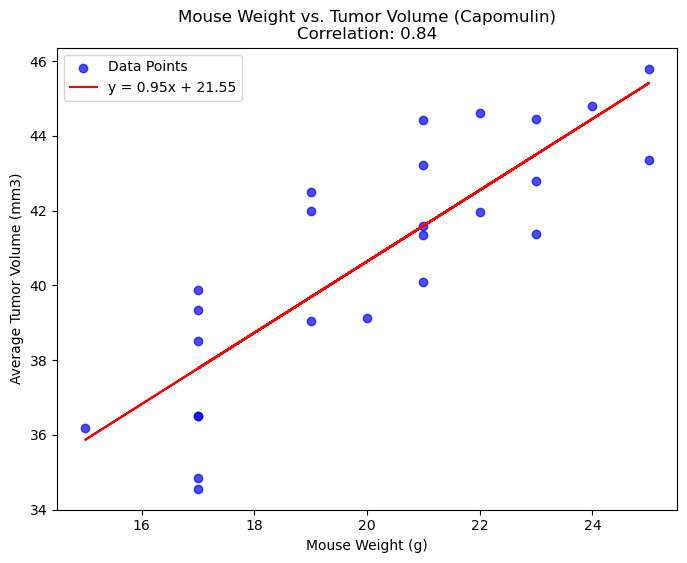

The correlation coefficient is 0.84


In [35]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
import scipy.stats as st
import numpy as np

# Extract relevant data
x_values = capomulin_merged["Weight (g)"]
y_values = capomulin_merged["Tumor Volume (mm3)"]

# Calculate correlation coefficient
correlation = st.pearsonr(x_values, y_values)[0]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(x_values, y_values)

# Generate regression line
regression_line = slope * x_values + intercept

# Generate scatter plot with regression line
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, color='b', alpha=0.7, label="Data Points")
plt.plot(x_values, regression_line, color='r', label=f"y = {slope:.2f}x + {intercept:.2f}")

# Add labels and title
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title(f"Mouse Weight vs. Tumor Volume (Capomulin)\nCorrelation: {correlation:.2f}")
plt.legend()

# Show the plot
plt.show()

# Display correlation coefficient and regression equation
print(f"The correlation coefficient is {correlation:.2f}")

